# ML | Credit Card Fraud Detection

### __Introduction__

The code demonstrates the use of machine learning to detect credit card fraud. It uses a dataset containing transactions made by credit cards to identify fraudulent transactions.

### __Applications__

Credit card fraud detection is crucial for financial institutions to protect their customers from fraudulent activities. Machine learning models can help in automatically identifying suspicious transactions.

In [6]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

## Loading the dataset

In [10]:
# Loading the dataset from the csv file using pandas 
data = pd.read_csv(r"D:\WEBEL_Assignments\Machine_learning_RJSir\Projects\Project_4_Creditcard_Fraud_Detection\creditcard.csv") 

In [11]:
# Print the shape of the data 
data.shape

(284807, 31)

The dataset contains 284,807 rows and 31 columns. Each row represents a transaction, and each column represents a different attribute or feature of that transaction.

In [3]:
# Printing the first five rows of the dataset
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains 284,807 transactions. Each transaction is described by 30 features (V1-V28, Amount, Time).

In [30]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [14]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print("OutlierFraction:",outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

OutlierFraction: 0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


- The 1st two lines of code create two separate DataFrames: one containing only fraudulent transactions (fraud), and the other containing only valid transactions (valid). This separation is based on the values in the 'Class' column of the original DataFrame (data).
-The 4th line determines the proportion of fraud cases in the dataset by calculating the outlierFraction i.e., ratio of fraudulent transactions to valid transactions. It then prints the outlier fraction (ratio of fraud to valid transactions).
-From 284,807 transactions, 492 are fraudulent (Class = 1) and 284315 are valid (Class = 0).

In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The above code print the header *Amount details of the fraudulent transaction* and then use the `describe()` method to generate descriptive statistics of the 'Amount' column for fraudulent transactions. The output includes `count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values` of the 'Amount' for fraudulent transactions.

In [7]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

The above code print the header *Amount details of the valid transaction* and then use the `describe()` method to generate descriptive statistics of the 'Amount' column for valid transactions. The output includes `count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values` of the 'Amount' for valid transactions.

### Correlation Matrix Visualization using Heat Map

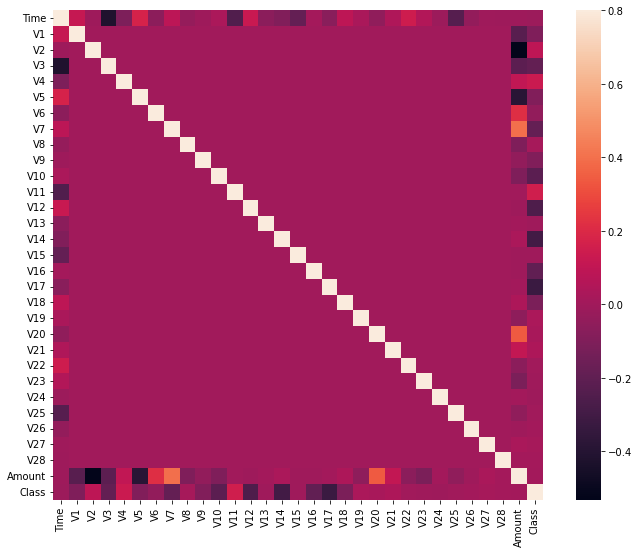

In [8]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

- The **Heat map** represents the correlation matrix of the dataset, where each cell shows the correlation coefficient between two variables.
- Correlation coefficients range from -1 to 1, indicating perfect negative correlation, no correlation, and perfect positive correlation, respectively.
- Darker shades in the heat map represent higher correlation coefficients, while lighter shades represent lower ones.
- The diagonal line represents the correlation of each variable with itself, always equal to 1.
- The visualisation shows the relationships between different features (columns) in the dataset. Each cell in the correlation matrix represents the correlation coefficient between two variables.
- This visualization aids in identifying relationships between features, understanding underlying data patterns and helping in: 
  - **Feature Selection:** Identifies features highly correlated with the target variable ('Class'), aiding in distinguishing valid from fraudulent transactions.
  - **Feature Engineering:** Helps decide on creating or transforming features based on observed correlations to enhance model performance in fraud detection.
  - **Model Interpretation:** Understanding feature correlations assists in interpreting model predictions, with strongly correlated features potentially impacting decision-making for more accurate fraud detection.

## Data Preparation: Dividing the Dataset into Features (X) and Target (Y)

In [19]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print("Shape of X datset : ", X.shape) 
print("Shape of Y datset : ",Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

Shape of X datset :  (284807, 30)
Shape of Y datset :  (284807,)


This code divides the dataset into features (X) and the target variable (Y):

- __X__: Contains all the features (columns) from the dataset except the "Class" column, which typically represents the target variable or label.
- __Y__: Contains the target variable "Class," which indicates whether each transaction is fraudulent (1) or valid (0).
- The __.shape__ function is used to print the dimensions of X and Y, providing information about the number of rows and columns in each.
- The __.values__ attribute is then used to convert X and Y into numpy arrays for  training the machine learning model. This conversion simplifies processing by removing column labels, resulting in arrays of just the numerical values.

## Splitting data into Training and Testing sets

In [20]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42)

This code uses scikit-learn's `train_test_split` function to split the dataset into training and testing sets:

- **train_test_split**: This function is used to randomly split the data into two subsets: one for training the model and the other for testing its performance.
- **xData**: Represents the features (X) of the dataset, which have been converted into numpy arrays.
- **yData**: Represents the target variable (Y) of the dataset, indicating whether each transaction is fraudulent or valid.
- **test_size**: Specifies the proportion of the dataset to include in the testing set. Here, it's set to 0.2, indicating that 20% of the data will be used for testing, while the remaining 80% will be used for training.
- **random_state**: Provides a seed value for the random number generator, ensuring reproducibility of the split. Setting it to a specific value (e.g., 42) ensures that the split will be the same each time the code is executed.

After splitting the data, the resulting subsets are assigned to the following variables:
- **xTrain**: Contains the features for training the model.
- **xTest**: Contains the features for evaluating the model's performance.
- **yTrain**: Contains the corresponding target values for training.
- **yTest**: Contains the corresponding target values for testing.

This process allows for training and evaluating machine learning models.

# **Machine Learning Algorithm** - Random Forest Classifier

The code uses a **Random Forest Classifier**, a popular machine learning algorithm, to detect fraudulent transactions. This algorithm is used in this code for fraud detection for several reasons:

- **Ensemble Learning**: Random Forest is an ensemble learning method that combines multiple decision trees to improve the overall performance of the model. By aggregating the predictions of multiple trees, Random Forest tends to be more robust and less prone to overfitting compared to individual decision trees.

- **Classification Task**: The dataset involves classifying transactions into fraudulent and valid categories, making it a binary classification task. Random Forest Classifier is particularly well-suited for classification tasks due to its ability to handle both numerical and categorical features, making it an appropriate choice for this fraud detection problem.

- **Non-linearity**: Random Forest can capture complex non-linear relationships between features and the target variable, which is beneficial for detecting fraud patterns that may not be linearly separable in the dataset.

- **Feature Importance**: Random Forest provides a measure of feature importance, which helps identify the most relevant features for detecting fraud. This information can be valuable for understanding the underlying patterns contributing to fraudulent transactions.

- **Scalability**: Random Forest is relatively scalable and can handle large datasets with high dimensionality, making it suitable for analyzing credit card transaction data, which often involves a large number of features.

- **Robustness to Overfitting**: Random Forest inherently reduces overfitting by averaging the predictions of multiple trees trained on different subsets of the data. This helps prevent the model from memorizing noise in the training data and improves its ability to generalize to unseen data.

Thus, the Random Forest Classifier is chosen for fraud detection in this code due to its ability to handle complex, non-linear relationships, provide feature importance insights, and mitigate overfitting, making it well-suited for the task of detecting fraudulent credit card transactions.

## Building and Training the Random Forest Classifier

In [21]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest)

In the above code the following steps are performed:

- **Random Forest Classifier Creation**: A Random Forest Classifier (RFC) model is created using the `RandomForestClassifier` class from the scikit-learn library.
  
- **Model Training**: The `fit` method is called on the RFC object, with the training data (`xTrain` and `yTrain`) as arguments. This trains the RFC model on the training data, allowing it to learn patterns and relationships between features and the target variable.

- **Making Predictions**: After the model is trained, predictions are made on the test data (`xTest`) using the `predict` method. The resulting predictions are stored in the variable `yPred`, representing the predicted classes for the test data.

## Model Evaluation

In [22]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is 0.8690748763736589


- **Accuracy**: The model achieved an accuracy of approximately 99.96%, indicating that it correctly classified the vast majority of transactions as either fraudulent or valid.
- **Precision**: The precision of 97.5% means that when the model predicts a transaction as fraudulent, it is correct 97.5% of the time.
- **Recall**: The recall of 77.6% indicates that the model correctly identified 79.6% of the actual fraudulent transactions.
- **F1-Score**: The F1-score, which is the harmonic mean of precision and recall, is 86.3%, indicating a good balance between precision and recall.
- **Matthews Correlation Coefficient (MCC)**: The MCC of 86.9% is a measure of the quality of binary classifications and indicates a strong correlation between the predicted and actual classes.

## Confusion Matrix for Random Forest Classifier Prediction

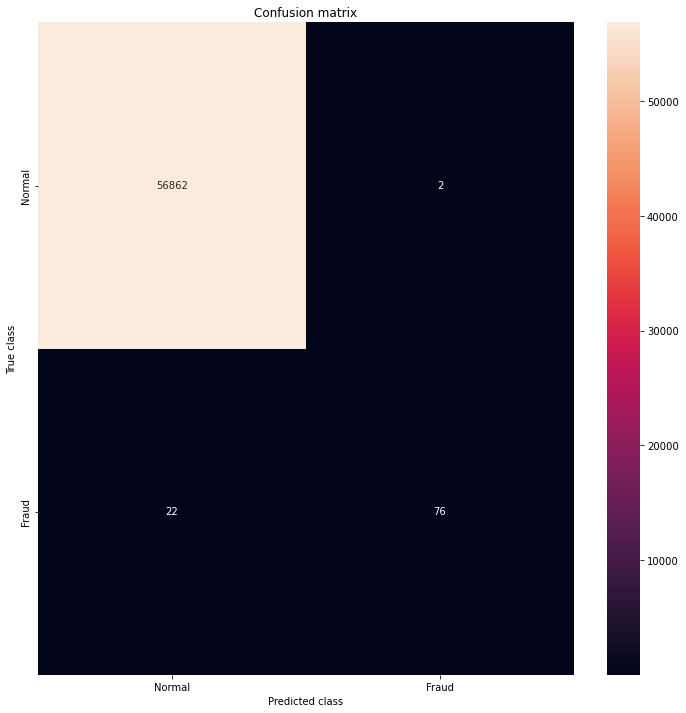

In [24]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

__Confusion Matrix__
>This confusion matrix visualizes the performance of the Random Forest Classifier model in predicting fraud and normal transactions. Each cell in the matrix represents the count of observations that fall into a particular category.


|                              |  Predicted Normal (Negative) | Predicted Fraud (Positive)  |
|------------------------------|------------------------------|-----------------------------|
| **Actual Normal(Neagtive)**  |        **TN = 56862**        |          **FP = 2**         |
| **Actual Fraud(Positive)**   |        **FN = 22**           |          **TP = 76**        |


- **True Negatives (TN)**: 56862 (Correctly predicted normal transactions)
- **False Positives (FP)**: 2 (Normal transactions incorrectly predicted as fraud)
- **False Negatives (FN)**: 22 (Fraudulent transactions incorrectly predicted as normal)
- **True Positives (TP)**: 76 (Correctly predicted fraudulent transactions)

----------------------------------------------------------------------------------------------*-------------------------------------------------------------------------------------------------------------------